IA 340 Lab 2


In [21]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://harrigan-ia340/Arrests.csv') # load the data from s3
df.head()#show the top 5 rows

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |


In [23]:
df.shape

(699030, 24)

there are 24 columns, and only 1 column is a numerical column
#there are a total of 699030 arrests in the data, and 391,873 of those arrests have only one charge

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699030 entries, 0 to 699029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CB_NO                 699030 non-null  int64 
 1   CASE NUMBER           440608 non-null  object
 2   ARREST DATE           699030 non-null  object
 3   RACE                  699030 non-null  object
 4   CHARGE 1 STATUTE      699030 non-null  object
 5   CHARGE 1 DESCRIPTION  699030 non-null  object
 6   CHARGE 1 TYPE         549580 non-null  object
 7   CHARGE 1 CLASS        694339 non-null  object
 8   CHARGE 2 STATUTE      307157 non-null  object
 9   CHARGE 2 DESCRIPTION  307157 non-null  object
 10  CHARGE 2 TYPE         175418 non-null  object
 11  CHARGE 2 CLASS        304965 non-null  object
 12  CHARGE 3 STATUTE      170594 non-null  object
 13  CHARGE 3 DESCRIPTION  170594 non-null  object
 14  CHARGE 3 TYPE         59933 non-null   object
 15  CHARGE 3 CLASS   

In [25]:
df=df.rename(columns={'CHARGE 1 DESCRIPTION': 'CHARGE 1 DESC'})
df.head()

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESC,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |


I renamed the column Charge 1 Description to Charge 1 Desc

In [26]:
df.isnull().sum() 

CB_NO                        0
CASE NUMBER             258422
ARREST DATE                  0
RACE                         0
CHARGE 1 STATUTE             0
CHARGE 1 DESC                0
CHARGE 1 TYPE           149450
CHARGE 1 CLASS            4691
CHARGE 2 STATUTE        391873
CHARGE 2 DESCRIPTION    391873
CHARGE 2 TYPE           523612
CHARGE 2 CLASS          394065
CHARGE 3 STATUTE        528436
CHARGE 3 DESCRIPTION    528436
CHARGE 3 TYPE           639097
CHARGE 3 CLASS          529072
CHARGE 4 STATUTE        604307
CHARGE 4 DESCRIPTION    604307
CHARGE 4 TYPE           674467
CHARGE 4 CLASS          604508
CHARGES STATUTE              0
CHARGES DESCRIPTION          0
CHARGES TYPE                 0
CHARGES CLASS                0
dtype: int64

There are a lot of missing variables in the charge 2, 3, and 4 columns because not every arrest has more than 1 charge associated with that arrest. I think leaving the dataset to contain the NaN would be important because it shows that there is no data for the other charges.

In [27]:
df[['ARREST DATE']]

,ARREST DATE
0,06/26/2014 10:51:00 PM
1,06/26/2014 12:07:00 AM
2,06/05/2014 11:58:00 AM
3,06/14/2014 04:50:00 AM
4,06/09/2014 08:45:00 AM
...,...
699025,08/21/2025 06:40:00 PM
699026,08/21/2025 08:02:00 PM
699027,08/21/2025 08:20:00 PM
699028,08/21/2025 03:09:00 PM


In [28]:
df.sort_values(by='CHARGE 1 DESC')

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESC,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
670529,30409020,JH502819,11/10/2024 02:21:00 PM,WHITE HISPANIC,720 ILCS 570.0/401-C-7-II,10<15 OBJECTS/PARTS LSD/ANALOG,F,1,720 ILCS 570.0/401-E,PCS-MFG/DEL- NON-NARCOTIC-SCHD I&II,...,F,4,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 570.0/401-C-7-II | 720 ILCS 570.0/401...,10<15 OBJECTS/PARTS LSD/ANALOG | PCS-MFG/DEL- ...,F | F | F | F,1 | 3 | 4 | 4
640325,18873417,HX221440,04/12/2014 09:20:00 PM,WHITE HISPANIC,720 ILCS 570.0/401-C-7-II,10<15 OBJECTS/PARTS LSD/ANALOG,F,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/401-C-7-II | | |,10<15 OBJECTS/PARTS LSD/ANALOG | | |,F | | |,1 | | |
71669,19060017,HY147478,02/11/2015 12:20:00 AM,WHITE,720 ILCS 570.0/401-C-7-II,10<15 OBJECTS/PARTS LSD/ANALOG,F,1,720 ILCS 550.0/4-D,CANNABIS - POSSESS 30-500 GRMS,...,NaN,Z,625 ILCS 5.0/3-707,INSURANCE - OPERATE MTR VEHICLE WITHOUT,NaN,U,720 ILCS 570.0/401-C-7-II | 720 ILCS 550.0/4-D...,10<15 OBJECTS/PARTS LSD/ANALOG | CANNABIS - PO...,F | F | |,1 | 4 | Z | U
340201,19509437,JA350972,07/16/2017 11:07:00 PM,WHITE,720 ILCS 570.0/401-A-7-A,15<100 GRAMS LSD/ANALOG,F,X,720 ILCS 570.0/401-C-2,PCS - MFG/DEL1<15 GR COCAINE/ANLG,...,F,3,720 ILCS 5.0/26-1-A-1,DISORDERLY CONDUCT - BREACH OF PEACE,M,C,720 ILCS 570.0/401-A-7-A | 720 ILCS 570.0/401-...,15<100 GRAMS LSD/ANALOG | PCS - MFG/DEL1<15 GR...,F | F | F | M,X | 1 | 3 | C
512564,19338513,HZ338152,07/06/2016 10:10:00 AM,WHITE HISPANIC,720 ILCS 570.0/401-A-7-A,15<100 GRAMS LSD/ANALOG,F,X,720 ILCS 570.0/402-A-2-A,PCS - POSSESS 15<100 GRAMS COCAINE,...,F,2,720 ILCS 550.0/4-E,"CANNABIS - POSS CANNABIS/500<2,000 GRAMS",F,3,720 ILCS 570.0/401-A-7-A | 720 ILCS 570.0/402-...,15<100 GRAMS LSD/ANALOG | PCS - POSSESS 15<100...,F | F | F | F,X | 1 | 2 | 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541482,19802623,JC241836,04/28/2019 04:50:00 PM,WHITE HISPANIC,9-24-040(A),YIELD TO VEHICLE ENTERING INTERSECTION,NaN,L,625 ILCS 5.0/3-707-A,OPERATE UNINSURED MTR VEHICLE,...,NaN,NaN,NaN,NaN,NaN,NaN,9-24-040(A) | 625 ILCS 5.0/3-707-A | |,YIELD TO VEHICLE ENTERING INTERSECTION | OPERA...,| | |,L | P | |
460926,30252607,JG298960,06/13/2023 07:10:00 AM,WHITE HISPANIC,9-24-040(A),YIELD TO VEHICLE ENTERING INTERSECTION,NaN,L,625 ILCS 5.0/6-101,UNLICENSED,...,NaN,P,NaN,NaN,NaN,NaN,9-24-040(A) | 625 ILCS 5.0/6-101 | 625 ILCS 5....,YIELD TO VEHICLE ENTERING INTERSECTION | UNLIC...,| | |,L | P | P |
491697,30334272,JH189288,03/15/2024 08:10:00 PM,WHITE HISPANIC,9-52-040(C),YIELDING RIGHT OF WAY,NaN,L,625 ILCS 5.0/6-101,UNLICENSED,...,NaN,P,NaN,NaN,NaN,NaN,9-52-040(C) | 625 ILCS 5.0/6-101 | 625 ILCS 5....,YIELDING RIGHT OF WAY | UNLICENSED | OPERATE U...,| | |,L | P | P |
662395,30402020,JH473659,10/18/2024 07:57:00 PM,WHITE HISPANIC,9-52-040(C),YIELDING RIGHT OF WAY,NaN,L,625 ILCS 5.0/3-707-A,OPERATE UNINSURED MTR VEHICLE,...,NaN,P,NaN,NaN,NaN,NaN,9-52-040(C) | 625 ILCS 5.0/3-707-A | 625 ILCS ...,YIELDING RIGHT OF WAY | OPERATE UNINSURED MTR ...,| | |,L | P | P |


In [29]:
df[5:10]

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESC,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
5,18921756,HX318527,06/25/2014 04:35:00 PM,BLACK,720 ILCS 5.0/19-4-A-1,CRIM TRESPASS TO RESIDENCE,M,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 5.0/19-4-A-1 | | |,CRIM TRESPASS TO RESIDENCE | | |,M | | |,A | | |
6,18911533,HX297219,06/10/2014 12:15:00 AM,WHITE HISPANIC,720 ILCS 5.0/12-3.2-A-2,DOMESTIC BATTERY - PHYSICAL CONTACT,M,A,720 ILCS 5.0/12-3.5-A,INTERF REPT DOMESTIC VIOLENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3.2-A-2 | 720 ILCS 5.0/12-3.5-...,DOMESTIC BATTERY - PHYSICAL CONTACT | INTERF R...,M | M | |,A | A | |
7,18919006,HX312887,06/21/2014 12:30:00 PM,BLACK,10-8-515,SOLICITING UNLAWFUL BUSINESS,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10-8-515 | | |,SOLICITING UNLAWFUL BUSINESS | | |,| | |,L | | |
8,18926798,NaN,07/03/2014 12:45:00 AM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
9,18914147,HX302600,06/14/2014 12:05:00 AM,BLACK,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,M,A,8-4-010(E),DISORDERLY CONDUCT - FAIL TO OBEY POLICE,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 5.0/31-1-A | 8-4-010(E) | |,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR | DIS...,M | | |,A | L | |


In [30]:
df[df['RACE'] == 'BLACK']

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESC,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699023,30500202,JJ383899,08/21/2025 03:10:00 PM,BLACK,720 ILCS 5.0/24-1.7-A,POSS FIREARM REPEAT FEL OFFEN,F,X,720 ILCS 570.0/401-C-1,PCS - MFG/DEL 1<15 GR HEROIN/ANALOG,...,M,A,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,M,A,720 ILCS 5.0/24-1.7-A | 720 ILCS 570.0/401-C-1...,POSS FIREARM REPEAT FEL OFFEN | PCS - MFG/DEL ...,F | F | M | M,X | 1 | A | A
699024,30500190,JJ383843,08/21/2025 02:30:00 PM,BLACK,720 ILCS 5.0/12-3.2-A-2,DOMESTIC BTRY/PHYSICAL CONTACT,M,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3.2-A-2 | | |,DOMESTIC BTRY/PHYSICAL CONTACT | | |,M | | |,A | | |
699025,30500251,JJ115877,08/21/2025 06:40:00 PM,BLACK,720 ILCS 5.0/12-1-A,ASSAULT - SIMPLE,M,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-1-A | | |,ASSAULT - SIMPLE | | |,M | | |,C | | |
699028,30500233,JJ383899,08/21/2025 03:09:00 PM,BLACK,720 ILCS 570.0/401-C-1,PCS - MFG/DEL 1<15 GR HEROIN/ANALOG,F,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/401-C-1 | | |,PCS - MFG/DEL 1<15 GR HEROIN/ANALOG | | |,F | | |,1 | | |


I sorted the charge description into alphabetical order
I filtered the race of the person being arrested to black, and 490549 of the people arrested were black

In [54]:
df['CASE'] = range(1, len(df) + 1)
df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'], format='%m/%d/%Y %I:%M:%S %p') #change the data type to date with specific format
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699030 entries, 0 to 699029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CB_NO                 699030 non-null  int64         
 1   CASE NUMBER           440608 non-null  object        
 2   ARREST DATE           699030 non-null  datetime64[ns]
 3   RACE                  699030 non-null  object        
 4   CHARGE 1 STATUTE      699030 non-null  object        
 5   CHARGE 1 DESC         699030 non-null  object        
 6   CHARGE 1 TYPE         549580 non-null  object        
 7   CHARGE 1 CLASS        694339 non-null  object        
 8   CHARGE 2 STATUTE      307157 non-null  object        
 9   CHARGE 2 DESCRIPTION  307157 non-null  object        
 10  CHARGE 2 TYPE         175418 non-null  object        
 11  CHARGE 2 CLASS        304965 non-null  object        
 12  CHARGE 3 STATUTE      170594 non-null  object        
 13 

In the code above I had to change the ARREST DATE column to a date time variable so that I could create visualizations with the arrest date column.

<Axes: title={'center': 'Top 10 Most Frequent Charge Descriptions'}, xlabel='CHARGE 1 DESC'>

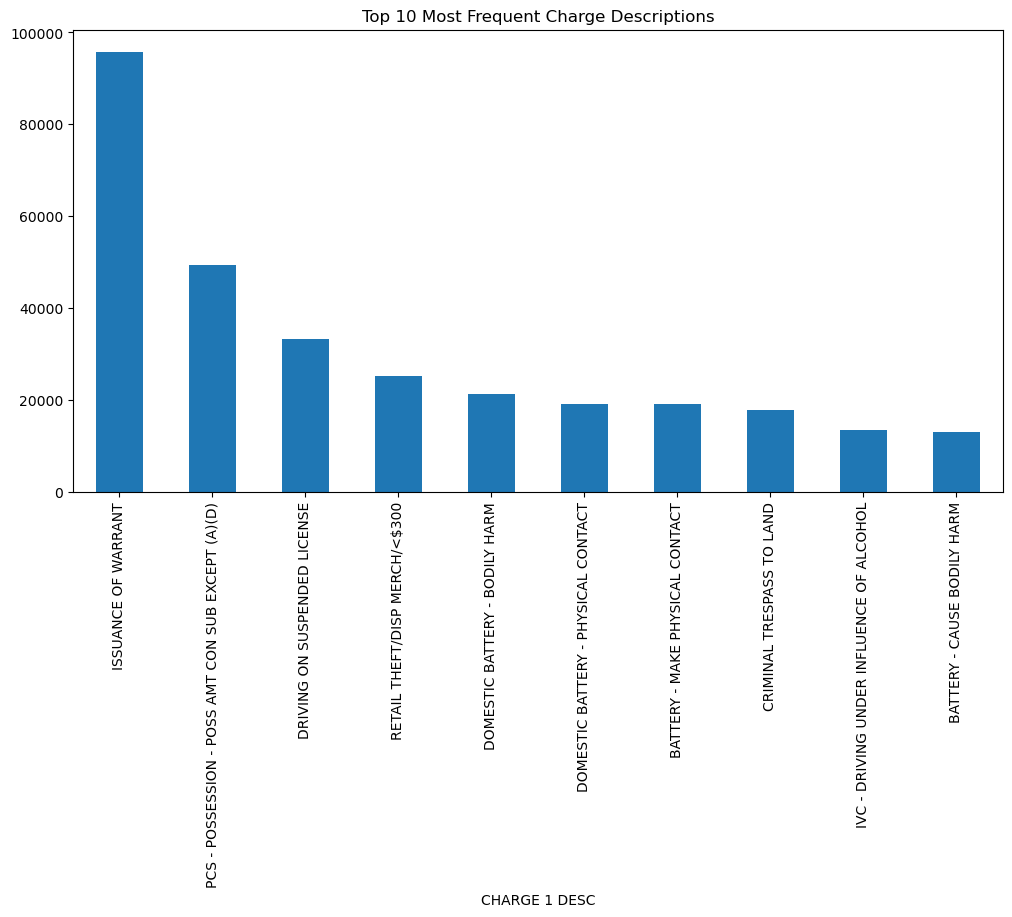

In [63]:
charge_counts = df['CHARGE 1 DESC'].value_counts().nlargest(10)

charge_counts.plot(kind='bar', figsize=(12, 6), title='Top 10 Most Frequent Charge Descriptions')

This graph shows the most common type of charge that gets people arrested. The most common is the issuance of a warrant, which means that there was a prior investigation on a crime and they have enough evidence to arrest them. The other most common types of charges are drug charges, domestic violence charges, and driving violations.

<Axes: title={'center': 'Number of Arrests Over Time (Monthly)'}, xlabel='ARREST DATE'>

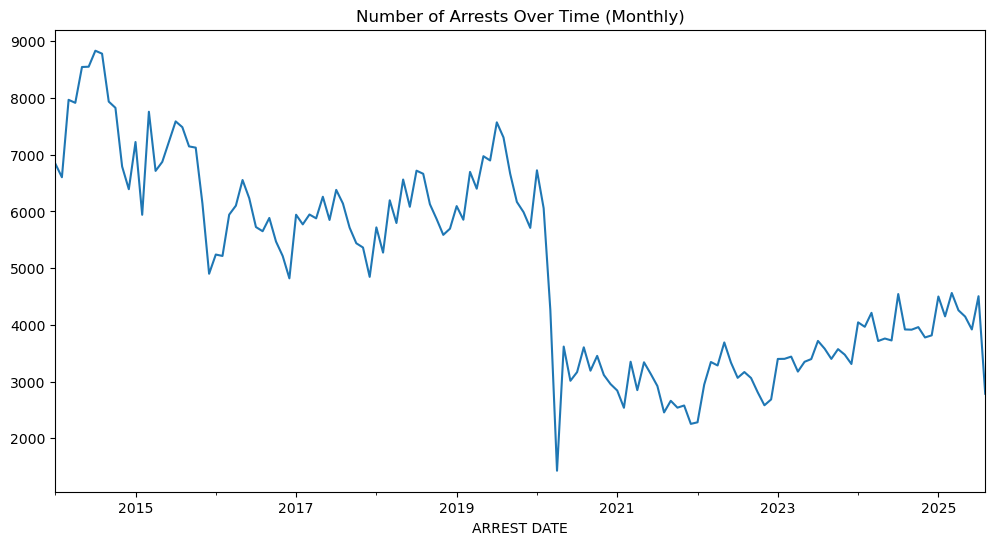

In [64]:
arrests_by_month = df.groupby(df['ARREST DATE'].dt.to_period('M')).size()

arrests_by_month.plot(kind='line', figsize=(12, 6), title='Number of Arrests Over Time (Monthly)')

This graph shows the amount of arrests over time. There is a major drop in arrests in 2020, probably due to the lockdown during covid. 